In [1]:
import os, json
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm 

number of train targets: 9869
number of corrupted sources: 165
Source uncorrleated path: image_log/uncorr/control_gs-006436_e-000002_b-006000.png


23it [00:00, 229.85it/s]

New best association for 0: 29564521.0
New best association for 3: 25653687.0
New best association for 4: 24480325.0
New best association for 5: 24342695.0
New best association for 7: 22423461.0


131it [00:00, 224.06it/s]

New best association for 102: 22207724.0


205it [00:00, 235.12it/s]

New best association for 165: 21516824.0


602it [00:02, 276.89it/s]

New best association for 565: 18836854.0


1869it [00:07, 235.52it/s]

New best association for 1838: 14997721.0


9233it [00:33, 283.34it/s]

New best association for 9203: 7531837.0


9869it [00:35, 276.94it/s]


All uncorrupted images saved.


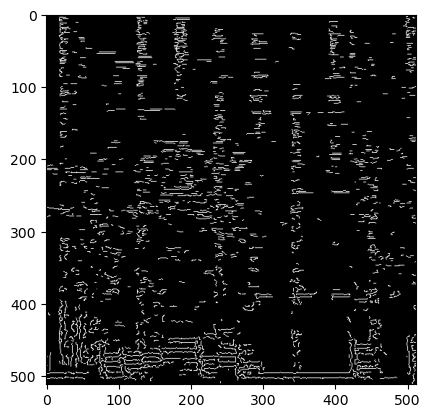

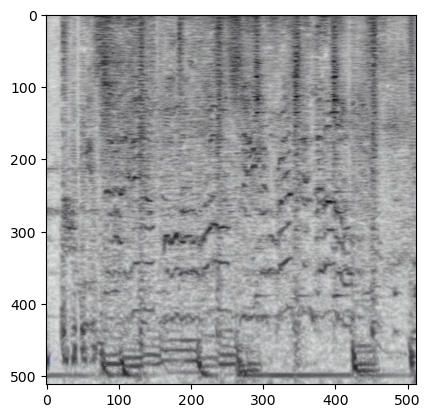

In [3]:
# where we will save all uncorrupted sources found
uncorr_dir = "image_log/uncorr"
os.makedirs(uncorr_dir,exist_ok=True)

# get paths to all corrupted sources in image_log
image_log_files = os.listdir("image_log")
source_corr_paths_mask = [image_log_files[i].startswith("control") for i in range(len(image_log_files))]
source_corr_paths = np.array(image_log_files)[source_corr_paths_mask]

# get all paths to training targets
train_target_paths = np.array(os.listdir("train-data/target"))
print(f"number of train targets: {len(train_target_paths)}")
print(f"number of corrupted sources: {len(source_corr_paths)}")

# for keeping track of files to match
match_table = {}

for k in [0]:

    try:
        source_corr_path = source_corr_paths[k]

        # where we will save uncorrupted image to
        source_uncorr_path = os.path.join(uncorr_dir, source_corr_path)

        print(f"Source uncorrleated path: {source_uncorr_path}")

        # target corresponding to corrupted source
        target_path = os.path.join("image_log", source_corr_path.replace("control","reconstruction"))
        # load target as vector
        target = np.array(cv2.cvtColor(cv2.imread(target_path), code=cv2.COLOR_BGR2RGB).ravel(), dtype=float)

        # keep track of best match in train targets
        best_match_i = -1
        best_association = np.inf
        for (i,train_target_path) in tqdm(enumerate(train_target_paths)):

            # get training target full path
            train_target_path = os.path.join("train-data/target", train_target_path)
            train_target = np.array(cv2.cvtColor(cv2.imread(train_target_path), code=cv2.COLOR_BGR2RGB).ravel(), dtype=float)

            association = np.linalg.norm(target - train_target, 1)
            if association < best_association:
                best_match_i = i
                best_association = association
                print(f"New best association for {i}: {best_association}")

        # read and save best matching uncorruted source
        best_match_path = os.path.join("train-data/source", train_target_paths[best_match_i])
        best_match = cv2.cvtColor(cv2.imread(best_match_path), code=cv2.COLOR_BGR2RGB)
        cv2.imwrite(source_uncorr_path, best_match)

        # save corresponding target
        best_match_target_path = os.path.join("train-data/target", train_target_paths[best_match_i])
        best_match_target_name = os.path.join(uncorr_dir, source_corr_path.replace("control","reconstruction"))
        cv2.imwrite(source_uncorr_path, cv2.cvtColor(cv2.imread(best_match_target_path), code=cv2.COLOR_BGR2RGB))

        plt.imshow(best_match)
        plt.figure()
        plt.imshow(cv2.cvtColor(cv2.imread(target_path), code=cv2.COLOR_BGR2RGB))

        # update match table
        match_table[source_corr_path] = best_match_path
    except:
        print(f"Problem for {source_corr_paths[k]}")

# save corrleation match table
with open("image_log/uncorr/corruption_match_table.json", "w") as outfile:
    json.dump(match_table, outfile)

print("All uncorrupted images saved.")


In [72]:
# where we will save all uncorrupted sources found
uncorr_dir = "image_log/uncorr"
os.makedirs(uncorr_dir,exist_ok=True)

# get paths to all corrupted sources in image_log
image_log_files = os.listdir("image_log")
source_corr_paths_mask = [image_log_files[i].startswith("control") for i in range(len(image_log_files))]
source_corr_paths = np.array(image_log_files)[source_corr_paths_mask]

# get all paths to training targets
train_target_paths = np.array(os.listdir("train-data/target"))

# for keeping track of files to match
match_table = {}

for k in tqdm(range(len(source_corr_paths))):

    try:
        source_corr_path = source_corr_paths[k]

        # where we will save uncorrupted image to
        source_uncorr_path = os.path.join(uncorr_dir, source_corr_path)

        # target corresponding to corrupted source
        target_path = os.path.join("image_log", source_corr_path.replace("control","reconstruction"))
        # load target as vector
        target = np.array(cv2.cvtColor(cv2.imread(target_path), code=cv2.COLOR_BGR2RGB).ravel(), dtype=float)

        # keep track of best match in train targets
        best_match_i = -1
        best_association = np.inf
        for (i,train_target_path) in enumerate(train_target_paths):

            # get training target full path
            train_target_path = os.path.join("train-data/target", train_target_path)
            train_target = np.array(cv2.cvtColor(cv2.imread(train_target_path), code=cv2.COLOR_BGR2RGB).ravel(), dtype=float)

            association = np.linalg.norm(target - train_target, 1)
            if association < best_association:
                best_match_i = i
                best_association = association

        # read and save best matching uncorruted source
        best_match_path = os.path.join("train-data/source", train_target_paths[best_match_i])
        best_match = cv2.cvtColor(cv2.imread(best_match_path), code=cv2.COLOR_BGR2RGB)
        cv2.imwrite(source_uncorr_path, best_match)

        # save corresponding target just in case
        best_match_target_path = os.path.join("train-data/target", train_target_paths[best_match_i])
        best_match_target_name = os.path.join(uncorr_dir, source_corr_path.replace("control","reconstruction"))
        cv2.imwrite(source_uncorr_path, cv2.cvtColor(cv2.imread(best_match_target_path), code=cv2.COLOR_BGR2RGB))

        # update match table
        match_table[source_corr_path] = best_match_path
    except:
        print(f"Problem for {source_corr_paths[k]}")

# save corrleation match table
with open("image_log/uncorr/corruption_match_table.json", "w") as outfile:
    json.dump(match_table, outfile)

print("All uncorrupted images saved.")


  2%|▏         | 2/84 [01:13<50:12, 36.73s/it]

Problem for conditioning_gs-000500_e-000000_b-000500.png


100%|██████████| 84/84 [51:24<00:00, 36.72s/it]

All uncorrupted images saved.
